In [17]:
from diffprivlib import BudgetAccountant
from diffprivlib.tools import mean, var
import diffprivlib as dp


In [15]:
import matplotlib.pyplot as plt
from numpy.random import random
import numpy as np
X = random(100)

In [5]:
acc = BudgetAccountant(epsilon=5, delta=0)
dp_mean = mean(X, bounds=(0, 1), accountant=acc)

In [6]:
acc = BudgetAccountant(1.5, 0)

dp_mean = mean(X, epsilon=1, bounds=(0, 1), accountant=acc)

try:
    dp_std = var(X, epsilon=1, bounds=(0, 1), accountant=acc)
except Exception as e:
    print("Error raised {}: {}".format(type(e), e))

Error raised <class 'diffprivlib.utils.BudgetError'>: Privacy spend of (1,0) not permissible; will exceed remaining privacy budget.Use BudgetAccountant.remaining() to check remaining budget.


In [12]:
# Parametrisation: Passed as a parameter (accountant=acc)

acc_p = BudgetAccountant()
mean(X, epsilon=1.618, bounds=(0, 1), accountant=acc_p)

print("Total spend: %r" % (acc_p.total(),))

Total spend: (epsilon=1.618, delta=0.0)


In [11]:
# Default: Set as a default (set_default())

acc_d = BudgetAccountant()
acc_d.set_default()
mean(X, epsilon=2.718, bounds=(0, 1))

print("Total spend: %r" % (acc_d.total(),))

Total spend: (epsilon=2.718, delta=0.0)


In [10]:
# Context manager: Using "with" over a block of code

with BudgetAccountant() as acc_w:
    mean(X, epsilon=1.5705, bounds=(0, 1))
    var(X, epsilon=1.5705, bounds=(0, 1))

print("Total spend: %r" % (acc_w.total(),))

Total spend: (epsilon=3.141, delta=0.0)


## Setting the slack¶
Composition of privacy budgets typically add up linearly, that is unless you allow a slack in your delta. This is governed by the slack parameter in the initialisation.

The benefit of a non-zero slack is especially evident when many queries are being asked.

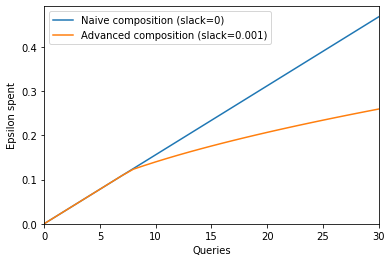

In [13]:
acc_n = BudgetAccountant()
acc_a = BudgetAccountant(slack=1e-3)
epsilon, queries = 2**-6, 30

budget_naive = [0] + [acc_n.spend(epsilon, 0).total()[0] for i in range(queries)]
budget_advanced = [0] + [acc_a.spend(epsilon, 0).total()[0] for i in range(queries)]

plt.plot(range(queries + 1), budget_naive, label="Naive composition (slack=%g)" % acc_n.slack)
plt.plot(range(queries + 1), budget_advanced, label="Advanced composition (slack=%g)" % acc_a.slack)
plt.xlabel("Queries")
plt.ylabel("Epsilon spent")
plt.xlim(0, queries)
plt.ylim(0, None)
plt.legend()

In [19]:
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype()
data, labels = dataset.data, dataset.target

In [41]:
acc = dp.BudgetAccountant(1, 0)
acc.set_default()

eps = 0.04
n_examples = data.shape[0]

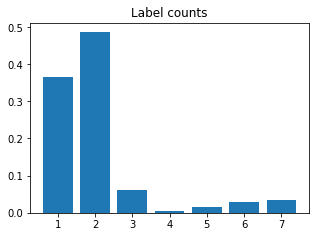

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5,3.5))

# print(dp.tools.histogram(labels, epsilon=eps, bins=7, range=(1, 8)))
ax.bar(np.linspace(1, 7, 7), dp.tools.histogram(labels, epsilon=eps, bins=7, range=(1, 8))[0] / n_examples)
ax.set_title("Label counts")
plt.show()

In [49]:
acc.total()


(epsilon=0.2, delta=0.0)

In [58]:
len(acc)

11

In [50]:
acc.remaining()


(epsilon=0.8, delta=0.0)

In [51]:
ranges = [(1000.0, 4000.0), (0, 360), (0, 66), (0, 1000.0), (0, 1000.0),
  (10, 10000.0), (0, 255), (0, 255), (0, 255), (10, 10000.0), (0, 3), (0, 39)]


In [59]:
dp.tools.mean(data[:, 0], bounds=ranges[0], epsilon=eps)

2959.706864349696

In [61]:
dp.tools.var(data[:, 0], bounds=ranges[0], epsilon=eps)

79279.19881594364

In [62]:
dp.tools.count_nonzero(data[:, 0] >= 3000, epsilon=eps) / n_examples

0.4939140671793354